<a href="https://colab.research.google.com/github/Sandirsln/Diajar_C_plus_plus/blob/main/CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown 191tGsffD4FEcXfSxhJ3tQ2-nQKpuL-F4
!unzip '/content/Dataset PCB-20231013T081319Z-001.zip'
!rm '/content/Dataset PCB-20231013T081319Z-001.zip'

Downloading...
From: https://drive.google.com/uc?id=191tGsffD4FEcXfSxhJ3tQ2-nQKpuL-F4
To: /content/Dataset PCB-20231013T081319Z-001.zip
100% 19.0M/19.0M [00:00<00:00, 149MB/s]
Archive:  /content/Dataset PCB-20231013T081319Z-001.zip
  inflating: Dataset PCB/Seq_250123_2/WIN_20230125_20_24_09_Pro.jpg  
  inflating: Dataset PCB/Seq_250123_2/WIN_20230125_20_23_48_Pro.jpg  
  inflating: Dataset PCB/Seq_250123_2/WIN_20230125_20_23_11_Pro.jpg  
  inflating: Dataset PCB/Seq_250123_5/WIN_20230125_21_12_52_Pro.jpg  
  inflating: Dataset PCB/Seq_250123_2/WIN_20230125_20_24_32_Pro.jpg  
  inflating: Dataset PCB/Seq_250123_2/WIN_20230125_20_23_18_Pro.jpg  
  inflating: Dataset PCB/Seq_250123_2/WIN_20230125_20_22_48_Pro.jpg  
  inflating: Dataset PCB/Seq_250123_2/WIN_20230125_20_24_24_Pro.jpg  
  inflating: Dataset PCB/Seq_250123_5/WIN_20230125_21_13_04_Pro.jpg  
  inflating: Dataset PCB/Seq_250123_2/WIN_20230125_20_22_31_Pro.jpg  
  inflating: Dataset PCB/Seq_250123_2/WIN_20230125_20_23_03_Pro.jpg 

In [ ]:
import os, shutil
import pandas as pd
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt

In [ ]:
IMG_PATH = 'Dataset PCB'
IMG_PATH1 = 'Dataset PCB/IMG1'
IMG_PATH2 = 'Dataset PCB/IMG2'

In [ ]:
os.makedirs(IMG_PATH1, exist_ok=True)
os.makedirs(IMG_PATH2, exist_ok=True)

In [ ]:
# @title <p> Organize Image

for folder in os.listdir(IMG_PATH):
  if folder not in ['IMG1', 'IMG2']:
    if folder != 'Seq_250123_2':
      for img in os.listdir(os.path.join(IMG_PATH, folder)):
        shutil.move(os.path.join(IMG_PATH, folder, img), os.path.join(IMG_PATH, 'IMG1', img))
    else :
      for img in os.listdir(os.path.join(IMG_PATH, folder)):
        shutil.move(os.path.join(IMG_PATH, folder, img), os.path.join(IMG_PATH, 'IMG2', img))

for folder in os.listdir(IMG_PATH):
  if folder not in ['IMG1', 'IMG2']:
      shutil.rmtree(os.path.join(IMG_PATH, folder))

for img in os.listdir(os.path.join(IMG_PATH1, 'Middle')):
  shutil.move(os.path.join(IMG_PATH1, 'Middle', img), os.path.join(IMG_PATH1, img))

shutil.rmtree(os.path.join(IMG_PATH1, 'Middle'))

In [ ]:
im = cv2.imread('/content/Dataset PCB/IMG2/WIN_20230125_20_22_02_Pro.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

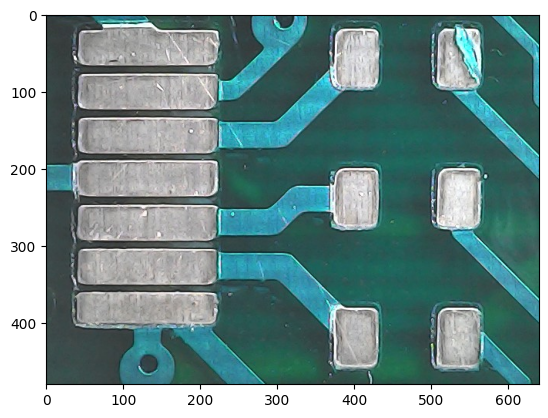

In [ ]:
plt.imshow(im)

In [ ]:
im_detect = cv2.Laplacian(im, cv2.CV_64F)

In [ ]:
im_detect.var()

1716.4475110222133

In [ ]:
def laplacian_var(img:str):
  im = cv2.imread(img)
  im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
  im = cv2.Laplacian(im, cv2.CV_64F)
  return im.var()

In [ ]:
laplacian_var('/content/Dataset PCB/IMG1/WIN_20230125_20_40_29_Pro.jpg')

1385.5613220323164

In [ ]:
laplacian_var('/content/Dataset PCB/IMG1/WIN_20230125_20_40_42_Pro.jpg')

1275.7803418402023

In [ ]:
imgs = []
value = []

for im in os.listdir(IMG_PATH1):
  img = os.path.join(IMG_PATH1, im)
  imgs.append(img)
  value.append(laplacian_var(img))

In [ ]:
pd.DataFrame({'img':imgs, 'laplacian':value}).sort_values('laplacian', ascending=False)

,img,laplacian
240,Dataset PCB/IMG1/WIN_20230125_21_04_06_Pro.jpg,1543.198896
140,Dataset PCB/IMG1/WIN_20230125_20_40_29_Pro.jpg,1385.561322
55,Dataset PCB/IMG1/WIN_20230125_20_40_48_Pro.jpg,1282.315530
178,Dataset PCB/IMG1/WIN_20230125_20_40_42_Pro.jpg,1275.780342
97,Dataset PCB/IMG1/WIN_20230125_21_04_15_Pro.jpg,1233.290551
...,...,...
189,Dataset PCB/IMG1/WIN_20230126_05_33_50_Pro.jpg,11.339342
6,Dataset PCB/IMG1/WIN_20230126_05_17_18_Pro.jpg,11.322595
129,Dataset PCB/IMG1/WIN_20230126_05_48_29_Pro.jpg,11.182101
39,Dataset PCB/IMG1/WIN_20230126_05_33_45_Pro.jpg,11.024059
